Training CNN model based on 2 news channel

In [20]:
# import libraries
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
import os
import pandas as pd

# Set the paths to your "good" and "bad" parent folders
good_parent_folder = r'/content/drive/MyDrive/news/good_news_data_images'
bad_parent_folder = r'/content/drive/MyDrive/news/all_bad_news_images'

# Function to load images and label them
def load_images_and_label(folder_path, label):
    image_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg"):  # Adjust the file extension as needed
                image_paths.append(os.path.join(root, file))
    df = pd.DataFrame({'Image_Path': image_paths, 'Label': label})
    return df

# Load "good" images and label them as "good", selecting approximately 7000 rows randomly
df_good = load_images_and_label(good_parent_folder, 'good').sample(n=7000, random_state=1)

# Load "bad" images and label them as "bad"
df_bad = load_images_and_label(bad_parent_folder, 'bad')

# Concatenate the dataframes
df = pd.concat([df_good, df_bad], ignore_index=True)

# Display the head of the dataframe
print(df.head())

                                          Image_Path Label
0  /content/drive/MyDrive/news/good_news_data_ima...  good
1  /content/drive/MyDrive/news/good_news_data_ima...  good
2  /content/drive/MyDrive/news/good_news_data_ima...  good
3  /content/drive/MyDrive/news/good_news_data_ima...  good
4  /content/drive/MyDrive/news/good_news_data_ima...  good


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df

,Image_Path,Label
0,/content/drive/MyDrive/news/good_news_data_ima...,good
1,/content/drive/MyDrive/news/good_news_data_ima...,good
2,/content/drive/MyDrive/news/good_news_data_ima...,good
3,/content/drive/MyDrive/news/good_news_data_ima...,good
4,/content/drive/MyDrive/news/good_news_data_ima...,good
...,...,...
13631,/content/drive/MyDrive/news/all_bad_news_image...,bad
13632,/content/drive/MyDrive/news/all_bad_news_image...,bad
13633,/content/drive/MyDrive/news/all_bad_news_image...,bad
13634,/content/drive/MyDrive/news/all_bad_news_image...,bad


In [3]:
df.sample(2)

,Image_Path,Label
10677,/content/drive/MyDrive/news/all_bad_news_image...,bad
1411,/content/drive/MyDrive/news/good_news_data_ima...,good


In [4]:
def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Normalize pixel values to be in the range [0, 1]
    image = image.astype('float32') / 255.0

    return image

# Subsample the training data
df_train_subsampled = df.sample(n=1500, random_state=42)  # Adjusting the sample size as we needed

# Apply preprocessing to all images in the subsampled DataFrame
df_train_subsampled['Processed_Image'] = df_train_subsampled['Image_Path'].apply(preprocess_image)

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
df_train_subsampled['Encoded_Label'] = label_encoder.fit_transform(df_train_subsampled['Label'])



# Assuming df is the original DataFrame containing the image paths and labels
# Subsample the validation data
# df_val_subsampled = df.sample(n=300, random_state=42)  # Adjusting the sample size as needed

# # Apply preprocessing to all images in the subsampled DataFrame
# df_val_subsampled['Processed_Image'] = df_val_subsampled['Image_Path'].apply(preprocess_image)

# # Convert labels to numerical format using LabelEncoder
# label_encoder = LabelEncoder()
# df_val_subsampled['Encoded_Label'] = label_encoder.fit_transform(df_val_subsampled['Label'])



In [5]:
df_train_subsampled

,Image_Path,Label,Processed_Image,Encoded_Label
9931,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.6313726, 0.32156864, 0.24705882], [0.6431...",0
7481,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.24705882, 0.19215687, 0.12941177], [0.203...",0
3289,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.08627451, 0.015686275, 0.52156866], [0.08...",1
13069,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.38431373, 0.4, 0.38039216], [0.07450981, ...",0
8271,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.13333334, 0.13333334, 0.13333334], [0.129...",0
...,...,...,...,...
5376,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.4509804, 0.49803922, 0.52156866], [0.4588...",1
3601,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.36078432, 0.40784314, 0.41568628], [0.356...",1
6472,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.40392157, 0.28627452, 0.84313726], [0.403...",1
12190,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.89411765, 0.77254903, 0.6431373], [0.9254...",0


In [7]:

# Data Augmentation
# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=40,  # Rotate images by 40 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in on images by 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in newly created pixels
)

# Create a generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_subsampled,  # Your training dataframe
    x_col="Image_Path",  # Column containing image file paths
    y_col="Label",  # Column containing labels
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Batch size
    class_mode='binary'  # Binary classification
)

# Create a generator for validation data
# val_generator = datagen.flow_from_dataframe(
#     dataframe=df_val_subsampled,  # Your validation dataframe
#     x_col="Image_Path",  # Column containing image file paths
#     y_col="Label",  # Column containing labels
#     target_size=(150, 150),  # Resize images to 150x150
#     batch_size=32,  # Batch size
#     class_mode='binary'  # Binary classification
#)

Found 1500 validated image filenames belonging to 2 classes.


In [22]:
# Update the build_and_compile_model function to handle binary classification correctly
def build_and_compile_model(input_shape=(224, 224, 3), learning_rate=0.001):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))

    # Use a sigmoid activation function and a single unit for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Example usage:
# Assuming you have two classes: 'good' and 'bad'
num_classes = 2
learning_rate = 0.001  # Set the initial learning rate

model = build_and_compile_model(input_shape=(224, 224, 3), learning_rate=learning_rate)

# Convert labels to numerical format using LabelEncoder
# label_encoder = LabelEncoder()
# df_train_subsampled['Encoded_Label'] = label_encoder.fit_transform(df_train_subsampled['Label'])

# Split the subsampled data into training and testing sets
X_train_subsampled, X_val_subsampled, y_train_subsampled, y_val_subsampled = train_test_split(
    np.array(df_train_subsampled['Processed_Image'].tolist()),
    df_train_subsampled['Encoded_Label'],
    test_size=0.2,
    random_state=42
)

# Shape of the training and validation sets
print(f"X_train_subsampled shape: {X_train_subsampled.shape}, y_train_subsampled shape: {y_train_subsampled.shape}")
print(f"X_val_subsampled shape: {X_val_subsampled.shape}, y_val_subsampled shape: {y_val_subsampled.shape}")

# Train your model
r = model.fit(X_train_subsampled, y_train_subsampled, epochs=10, batch_size=32, validation_data=(X_val_subsampled, y_val_subsampled))

X_train_subsampled shape: (1200, 224, 224, 3), y_train_subsampled shape: (1200,)
X_val_subsampled shape: (300, 224, 224, 3), y_val_subsampled shape: (300,)
Epoch 1/10
38/38 [==============================] - 4s 64ms/step - loss: 1.2276 - accuracy: 0.5742 - val_loss: 0.5876 - val_accuracy: 0.6067
Epoch 2/10
38/38 [==============================] - 2s 47ms/step - loss: 0.4313 - accuracy: 0.7942 - val_loss: 0.3634 - val_accuracy: 0.8200
Epoch 3/10
38/38 [==============================] - 2s 47ms/step - loss: 0.2350 - accuracy: 0.8917 - val_loss: 0.3132 - val_accuracy: 0.8767
Epoch 4/10
38/38 [==============================] - 2s 51ms/step - loss: 0.1223 - accuracy: 0.9567 - val_loss: 0.3103 - val_accuracy: 0.9100
Epoch 5/10
38/38 [==============================] - 2s 52ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.3625 - val_accuracy: 0.8567
Epoch 6/10
38/38 [==============================] - 2s 55ms/step - loss: 0.0189 - accuracy: 0.9967 - val_loss: 0.4474 - val_accuracy: 0.876

In [23]:
# Define the path to the new thumbnail dataset in Google Drive
new_data_folder = '/content/drive/MyDrive/news/mixed_news_bad_good'

# Load and preprocess images from the new dataset
def preprocess_image_for_prediction(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# List the images in the new dataset folder
new_data_images = [f for f in os.listdir(new_data_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Load the trained model
model = build_and_compile_model()  # Replace with the actual path to your trained model

# Make predictions on the new dataset
predictions = []

for image_file in new_data_images:
    image_path = os.path.join(new_data_folder, image_file)
    processed_image = preprocess_image_for_prediction(image_path)
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension
    prediction = model.predict(processed_image)
    predictions.append({'image_file': image_file, 'prediction': prediction[0][0]})

# Display the predictions
for result in predictions:
    print(f"Image: {result['image_file']}, Prediction: {result['prediction']}")

1/1 [==============================] - 0s 30ms/step
Image: 9CamvSUpx8I.jpg, Prediction: 0.5141807198524475
Image: 1iuZY4Rk780.jpg, Prediction: 0.4946597218513489
Image: _ajlHovOoPs.jpg, Prediction: 0.4921656847000122
Image: 2AjruLiSsec.jpg, Prediction: 0.5294976234436035
Image: 8Z6L0crGI7Q.jpg, Prediction: 0.5357738137245178
Image: 8Z44IWQfBv8.jpg, Prediction: 0.4611257016658783
Image: 8ML3oCQeIL0.jpg, Prediction: 0.4973490834236145
Image: 0fVn2vWAolg.jpg, Prediction: 0.5401101112365723
Image: dbs6Xy7Ggpo.jpg, Prediction: 0.5277978777885437
Image: 8qwZBY4ddN8.jpg, Prediction: 0.5011983513832092
Image: 5-4NSRNEgf4.jpg, Prediction: 0.5072222352027893
Image: 6pd7EpspR7w.jpg, Prediction: 0.5085145831108093
Image: frame_0004.jpg, Prediction: 0.5135607719421387
Image: Copy of frame_0096.jpg, Prediction: 0.5036128759384155
Image: Copy of frame_0104.jpg, Prediction: 0.5001285076141357
Image: Copy of frame_0102.jpg, Prediction: 0.47304028272628784
Image: Copy of frame_0095.jpg, Prediction: 0.50

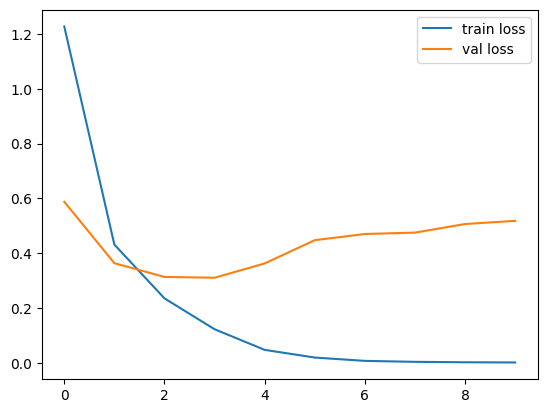

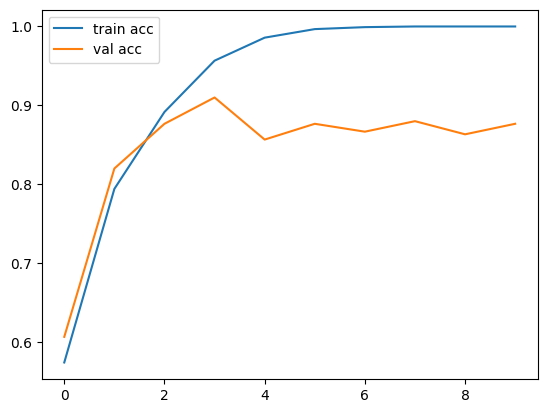

<Figure size 640x480 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving Model

In [25]:
# Save the trained model
model.save('/content/drive/MyDrive/news/model_news.h5')

### Loading Model and testing for one image

In [26]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/news/model_news.h5'
model = load_model(saved_model_path)

# Define the path to the new image
img_path = '/content/drive/MyDrive/news/img_bad/video_zMzObzaCcm0/frame_0006.jpg'  # Replace with the actual path to your new image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size as needed
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0  # Normalize the image

# Make a prediction
result = model.predict(img)

# Check the prediction
if result[0][0] > 0.5:
    prediction = 'good'
    print('The image is labeled as good')
else:
    prediction = 'bad'
    print('The image is labeled as bad')


1/1 [==============================] - 0s 69ms/step
The image is labeled as bad
